In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
data_test = pd.read_pickle('/content/drive/MyDrive/1차팀플/dataset/x_test새범주화적용.pkl')
data = pd.read_pickle('/content/drive/MyDrive/1차팀플/dataset/x_train새범주화적용.pkl')
y_train = pd.read_pickle('/content/drive/MyDrive/1차팀플/dataset/1_y_train_test1과인덱스맞춘것.pkl')
y_test = pd.read_pickle('/content/drive/MyDrive/1차팀플/dataset/1_y_test_test1과인덱스맞춘것.pkl')
plus_train = pd.read_pickle('/content/drive/MyDrive/1차팀플/dataset/x_train_1_2_삼분류비중.pkl')
plus_test = pd.read_pickle('/content/drive/MyDrive/1차팀플/dataset/x_test_1_3_삼분류비중.pkl')
mem = pd.read_pickle('/content/drive/MyDrive/1차팀플/dataset/x_data_멤버십여부.pkl')

X = pd.concat([data,mem,plus_train], axis=1)
x = pd.concat([data_test,mem,plus_test], axis=1)

X = X.dropna(axis=0)
x = x.dropna(axis=0)

y_test.columns = ['타겟']
y_train.columns = ['타겟']


X.shape, x.shape, y_train.shape, y_test.shape

((19169, 96), (19169, 96), (19169, 1), (19169, 1))

In [ ]:
X1 = X[['분기sum_net','편의품_sum12_net', '선매품_sum12_net','분기count_net',
'Asum_net','선매품_count12_net','편의품비중','편의품_count12_net', '선매품비중',
'분기sum변동폭','전문품_sum12_net','전문품비중','의류/잡화sum_net','식품sum_net',
'Bsum_net','Acount_net','식품count_net','명품sum_net','의류/잡화count_net','전문품_count12_net',
'분기count변동폭','선매품_sum12_변동폭','가전sum_net','스포츠/레저sum_net','편의품_sum12_변동폭','Asum변동폭',
'가구/인테리어sum_net','스포츠/레저count_net','일상용품sum_net','편의품_count12_변동폭','명품count_net',
'가전count_net','선매품_count12_변동폭','뷰티count_net','가구/인테리어count_net',
'가전sum변동폭','명품sum변동폭','일상용품count_net',
'Bcount_net','가구/인테리어sum변동폭']]

x1 = x[['분기sum_net','편의품_sum13_net', '선매품_sum13_net','분기count_net',
'Asum_net','선매품_count13_net','편의품비중','편의품_count13_net', '선매품비중',
'분기sum변동폭','전문품_sum13_net','전문품비중','의류/잡화sum_net','식품sum_net',
'Bsum_net','Acount_net','식품count_net','명품sum_net','의류/잡화count_net','전문품_count13_net',
'분기count변동폭','선매품_sum13_변동폭','가전sum_net','스포츠/레저sum_net','편의품_sum13_변동폭','Asum변동폭',
'가구/인테리어sum_net','스포츠/레저count_net','일상용품sum_net','편의품_count13_변동폭','명품count_net',
'가전count_net','선매품_count13_변동폭','뷰티count_net','가구/인테리어count_net',
'가전sum변동폭','명품sum변동폭','일상용품count_net',
'Bcount_net','가구/인테리어sum변동폭']]

X1.columns = x1.columns

In [ ]:
X1.shape, x1.shape

((19169, 40), (19169, 40))

In [ ]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

kf = StratifiedKFold(n_splits=5,  random_state=1)
model = LGBMClassifier()

all_acc = []
fold_idx = 0

features = X1
labels = y_train

for train_idx, test_idx in kf.split(features, labels):
    
    train_x, train_y = features.iloc[train_idx], labels.iloc[train_idx]
    test_x, test_y = features.iloc[test_idx], labels.iloc[test_idx]

    model.fit(train_x, train_y)
    pred_y = model.predict(test_x)
    acc = accuracy_score(test_y, pred_y)
    
    fold_idx += 1
    
    all_acc.append(acc)

print(f"StratifiedKFold 모두 수행 후 평균 예측도 : {np.mean(all_acc)}")


pred = model.predict(x1)
print('정확도',accuracy_score(y_test, pred)) 
print('정밀도',precision_score(y_test, pred))
print('재현율',recall_score(y_test, pred))    
print('f1 score',f1_score(y_test, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StratifiedKFold 모두 수행 후 평균 예측도 : 0.6882997106232684
정확도 0.7052011059523189
정밀도 0.731211498973306
재현율 0.7013293943870015
f1 score 0.7159587836139734


In [ ]:
labledata = x1.iloc[pred == 0,:]
targetdata = x1.iloc[pred == 1,:]

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

inertia_arr = []
k_range = range(2,15)
for k in k_range:
  Kmeans = KMeans(n_clusters = k, random_state=200)
  Kmeans.fit(targetdata)
  interia = Kmeans.inertia_
  print('k:',k,'inertia',interia)
  inertia_arr.append(interia)

inertia_arr = np.array(inertia_arr)

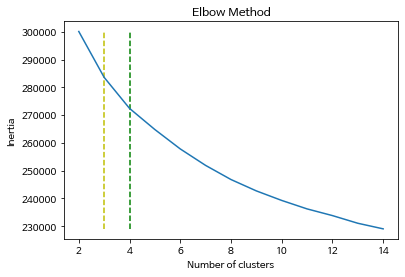

In [ ]:
import matplotlib.pyplot as plt
plt.plot(k_range, inertia_arr)
plt.vlines(4, ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--',colors='g')
plt.vlines(3,ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--',colors='y')
# plt.vlines(6,ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--',colors='b')
# plt.vlines(8,ymin=inertia_arr.min()*0.9999, ymax=inertia_arr.max()*1.0003, linestyles='--',colors='r')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# K means
from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics import silhouette_score 
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
# Fit K-Means
kmeans_1 = KMeans(n_clusters=4,random_state= 1)
# Use fit_predict to cluster the dataset
predictions = kmeans_1.fit_predict(targetdata)
# Calculate cluster validation metrics
score_kemans_s = silhouette_score(targetdata, kmeans_1.labels_, metric='euclidean')
score_kemans_c = calinski_harabasz_score(targetdata, kmeans_1.labels_)
score_kemans_d = davies_bouldin_score(targetdata, predictions)
print('Silhouette Score: %.4f' % score_kemans_s)
print('Calinski Harabasz Score: %.4f' % score_kemans_c)
print('Davies Bouldin Score: %.4f' % score_kemans_d)

Silhouette Score: 0.0861
Calinski Harabasz Score: 644.9501
Davies Bouldin Score: 2.8659


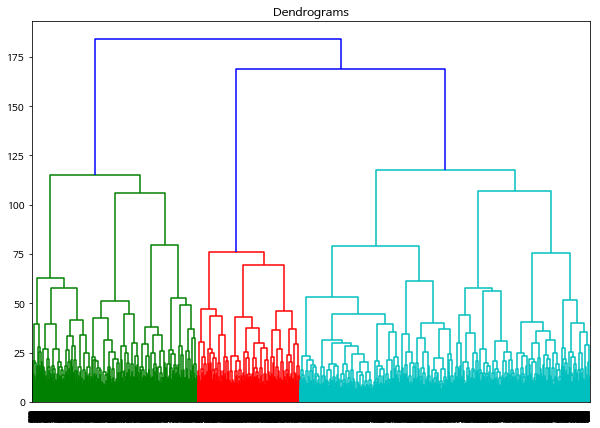

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(targetdata, method='ward'))

In [ ]:
out=pd.DataFrame(kmeans_1.labels_) #예측 타겟값의 군집 0,1,2,3
out.columns=['cluster']
out.index = targetdata.index #고객번호 인덱스
cus1 = out[out['cluster'] == 0]
cus2 = out[out['cluster'] == 1]
cus3 = out[out['cluster'] == 2]
cus4 = out[out['cluster'] == 3]

In [ ]:
targettable = pd.concat([out,x],axis=1,join='inner')

In [ ]:
targettable1 = pd.concat([cus1,x],axis=1,join='inner')
targettable2 = pd.concat([cus2,x],axis=1,join='inner')
targettable3 = pd.concat([cus3,x],axis=1,join='inner')
targettable4 = pd.concat([cus4,x],axis=1,join='inner')

In [ ]:
targettable.shape

(9740, 97)

In [ ]:
targettable1.describe()

,cluster,Asum변동폭,Acount변동폭,Asum_net,Acount_net,Bsum변동폭,Bcount변동폭,Bsum_net,Bcount_net,Csum변동폭,Ccount변동폭,Csum_net,Ccount_net,Dsum변동폭,Dcount변동폭,Dsum_net,Dcount_net,분기sum변동폭,분기count변동폭,분기sum_net,분기count_net,식품sum변동폭,식품count변동폭,식품sum_net,식품count_net,일상용품sum변동폭,일상용품count변동폭,일상용품sum_net,일상용품count_net,의류/잡화sum변동폭,의류/잡화count변동폭,의류/잡화sum_net,의류/잡화count_net,명품sum변동폭,명품count변동폭,명품sum_net,명품count_net,뷰티sum변동폭,뷰티count변동폭,뷰티sum_net,뷰티count_net,유아/아동용품sum변동폭,유아/아동용품count변동폭,유아/아동용품sum_net,유아/아동용품count_net,스포츠/레저sum변동폭,스포츠/레저count변동폭,스포츠/레저sum_net,스포츠/레저count_net,기타sum변동폭,기타count변동폭,기타sum_net,기타count_net,교육/문화/사무용품sum변동폭,교육/문화/사무용품count변동폭,교육/문화/사무용품sum_net,교육/문화/사무용품count_net,가구/인테리어sum변동폭,가구/인테리어count변동폭,가구/인테리어sum_net,가구/인테리어count_net,가전sum변동폭,가전count변동폭,가전sum_net,가전count_net,보석sum변동폭,보석count변동폭,보석sum_net,보석count_net,선매품_sum13_net,전문품_sum13_net,편의품_sum13_net,선매품_count13_net,전문품_count13_net,편의품_count13_net,선매품_sum13_변동폭,전문품_sum13_변동폭,편의품_sum13_변동폭,선매품_count13_변동폭,전문품_count13_변동폭,편의품_count13_변동폭,구매시간(새벽),구매시간(아침),구매시간(점심),구매시간(저녁),20대이하,30대,40대,50대,60대이상,F,M,멤버십X,멤버십O,선매품비중,전문품비중,편의품비중
count,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.00000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.0,9740.0,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9740.000000,9.740000e+03,9.740000e+03,9.740000e+03
mean,1.386448,0.567762,0.549897,0.162423,0.147433,0.519507,0.442197,0.110062,0.073409,0.503183,0.498460,0.029877,0.026386,0.168070,0.214784,-0.060062,-0.077413,0.717659,0.749179,0.422793,0.358214,1.167146,0.761499,0.322587,0.232752,1.484908,0.973717,0.200513,0.144559,1.046715,1.258830,0.230698,0.248768,0.847125,0.995688,0.102156,0.232033,1.268275,1.474743,0.117762,0.150103,1.166324,1.082854,0.049076,0.046099,1.516632,1.450000,0.222587,0.272998,1.317043,1.124025,0.093224,0.074949,1.396304,1.257392,0.132033,0.148357,1.552361,1.552875,0.103901,0.100308,1.416940,1.782033,0.209548,0.272998,0.490452,0.696099,0.044045,0.06078,-0.178542,0.013655,-0.301540,-0.228337,-0.100205,-0.201951,0.609138,1.085729,1.000924,0.798152,1.149487,0.565195,0.0,0.0,0.000924,0.999076,0.029979,0.212834,0.416016,0.269918,0.071253,0.825154,0.174846,0.681520,0.318480,3.504495e-05,9.880402e-06,1.899205e-05
std,0.994977,0.768400,0.732306,0.521934,0.561294,0.739321,0.674781,0.589640,0.552651,0.764825,0.745109,0.606829,0.590876,0.626278,0.661582,0.447680,0.482322,0.847043,0.804051,0.603830,0.722598,1.148394,0.844336,0.973329,0.714176,1.279294,0.979053,1.156214,0.845035,1.028086,1.109679,0.848682,0.954248,1.400987,1.409553,0.871174,0.937387,1.212337,1.196428,0.996860,1.070689,1.401983,1.124919,1.055233,0.921629,1.316849,1.136113,1.138767,1.070428,1.251551,1.047990,1.063994,0.920234,1.483187,1.209442,1.163686,0.990074,1.562022,1.394022,1.217528,1.172073,1.634035,1.735760,1.231217,1.406390,1.194681,1.406805,0.735199,0.89344,0.477281,0.679688,0.742376,0.555030,0.682930,0.537128,0.854251,1.354635,1.096953,0.916202,1.308637,0.764469,0.0,0.0,0.030385,0.030385,0.170539,0.409332,0.492922,0.443940,0.257259,0.379855,0.379855,0.465911,0.465911,7.876251e-05,3.359573e-05,

In [ ]:
table = pd.concat([out,x1],axis=1,join='inner')

table0 = table[table['cluster']==0]
table1 = table[table['cluster']==1]
table2 = table[table['cluster']==2]
table3 = table[table['cluster']==3]

In [ ]:
table.shape

In [ ]:
labledata['cluster'] = 0
table0['cluster'] = 1
table1['cluster'] = 1
table2['cluster'] = 1
table3['cluster'] = 1

In [ ]:
!pip install pydot
!pip install graphviz

In [ ]:
table0.shape, labledata.shape

((1791, 41), (9429, 41))

In [ ]:
table0.shape,table1.shape,table2.shape,table3.shape

((1791, 41), (4269, 41), (1805, 41), (1875, 41))

In [ ]:
df = pd.concat([table0,labledata]) #군집1의 예측데이터와 감소고객이 아닌 cluster = 0인 테이블 합쳐서 비교
df.shape

(11220, 41)

In [ ]:
# 군집해석 1
from sklearn import tree
import pydot
import graphviz
dt = tree.DecisionTreeClassifier(criterion = "entropy", max_depth=8)
clf = dt.fit(df.drop("cluster",axis=1),df["cluster"])
dot_data = tree.export_graphviz(clf,   # 의사결정나무 모형 대입
                               out_file = None,  # file로 변환할 것인가
                               feature_names = df.drop("cluster",axis=1).columns,  # feature 이름
                               class_names = df['cluster'].value_counts().index.astype('str'),  # target 이름
                               filled = True,           # 그림에 색상을 넣을것인가
                               rounded = True,          # 반올림을 진행할 것인가
                               special_characters = True)   # 특수문자를 사용하나

graph = graphviz.Source(dot_data)      
# filename="./tree.dot"
# filename1="./tree.png"

# with open(filename,"w") as f:
#     tree.export_graphviz(clf, out_file=f,feature_names = list(df.drop("cluster",axis=1).columns), filled=True, rounded=True,special_characters=True)

# (graph,) = pydot.graph_from_dot_file(filename)
# graph.write_png(filename1)
graph